!pip install EasyMIDI

In [1]:
from EasyMIDI import EasyMIDI,Track,Note,Chord
import pretty_midi
import IPython.display as ipd
from PIL import Image, ImageDraw

In [55]:
note_to_int = {"C":0, "C#":1, "Db":1, "D":2, "D#":3, "Eb":3, "E":4,
               "F":5, "F#":6, "Gb":6, "G":7, "G#":8, "Ab":8, "A":9, "A#":10, "Bb":10, "B":11}

int_to_note = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

chords = { "A":("A","C#","E"),
           "A7":("A","C#","E", "G"),
           "Am":("A","C","E"),
           "C":("C","E","G"),
           "C7":("C","E","G","Bb"),
           "Cm":("C","Eb","G"),
           "D":("D","F#","A"),
           "Dm":("D","F","A"),
           "E":("E","G#","B"),
           "Em":("E","G","B"),
           "Em7":("E","G","B","D"),
           "F":("F","A","C"),
           "Fm":("F","Ab","C"),
           "G":("G","B","D"),
           "G7":("G","B","D","F"),
           "Gm":("G","Bb","D"),
           "Bb": ("Bb", "D", "F")}

In [3]:
yesterday = ["F", "F", "Em7", "Em7", "A7", "A7", "Dm", "Dm", "Dm","C", "Bb", "Bb",
             "C7", "C7", "F", "E", "G7","G7","Gm","Gm","C","C"]

In [4]:
song = yesterday
easyMIDI = EasyMIDI()
track1 = Track("acoustic grand piano") 

for c in song:
    chord = chords[c]
    notes = []
    for i in range(len(chord)):
        notes.append(Note(chord[i], octave = 4, duration = 1/2, volume = 100))
    chord = Chord(notes)
    track1.addNotes([chord])


easyMIDI.addTrack(track1)
easyMIDI.writeMIDI("output.mid")

In [5]:
Fs = 22050
midi_data = pretty_midi.PrettyMIDI("output.mid")
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

In [6]:
def chord_to_rgb(chord):
    w = 12
    r = 255//w * note_to_int[chord[0]]
    g = 255//w * note_to_int[chord[1]]
    b = 255//w * note_to_int[chord[2]]
    return (r,g,b)

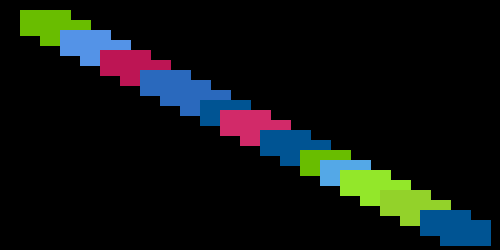

In [7]:
w, h = 500, 250
img = Image.new("RGB", (w, h)) 
x0, y0, x1, y1 = 0, 0, 50, 25

for c in song:
    chord = chords[c]
    rgb = chord_to_rgb(chord)
    color = "rgb({},{},{})".format(rgb[0],rgb[1],rgb[2])
    x0 += 20
    x1 += 20
    y0 += 10
    y1 += 10
    
    
    img1 = ImageDraw.Draw(img)
    coor = [(x0, y0), (x1, y1)]
    
    
    img1.rectangle(coor, fill = color)
    
   
    
display(img)

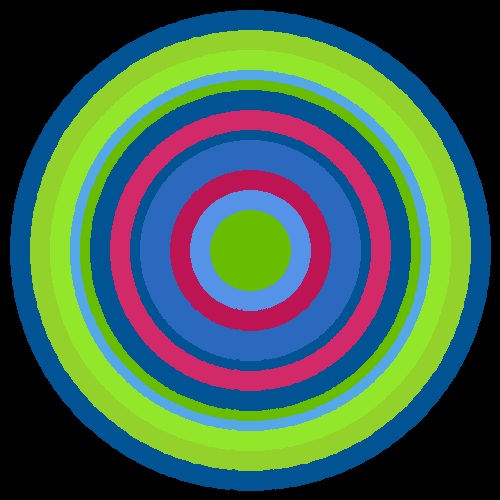

In [42]:
w, h = 500, 500
img = Image.new("RGB", (w, h)) 
x0, y0 = 0, 0

for i in range(len(song)-1, -1, -1):
    chord = chords[song[i]]
    rgb = chord_to_rgb(chord)
    color = "rgb({},{},{})".format(rgb[0],rgb[1],rgb[2])
    
    x0 += 10
    y0 += 10
    w -= 10
    h -= 10
    shape = [(x0, y0), (w, h)]
    
    img1 = ImageDraw.Draw(img)  
    
    img1.ellipse(shape, fill =color, outline=None)
    
   
    
display(img)

In [34]:
def chord_to_hsl(chord):
    w = 12
    h = 90//w * note_to_int[chord[0]]
    if h > 60:
        h = 360 - h
    s = 60 + 40//w * note_to_int[chord[1]]
    l = 40 + 60//w * note_to_int[chord[2]]
    return (h,s,l)

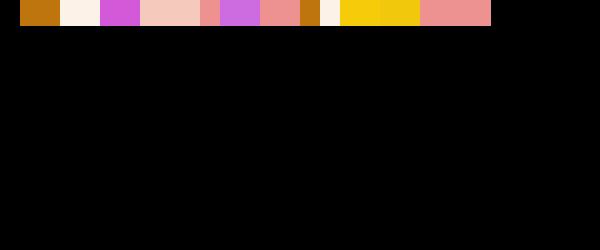

In [36]:
w, h = 600, 250
img = Image.new("RGB", (w, h)) 
x0, y0, x1, y1 = 0, 0, 50, 25

for c in song:
    chord = chords[c]
    hsl = chord_to_hsl(chord)
    color = "hsl({},{}%,{}%)".format(hsl[0],hsl[1],hsl[2])
    x0 += 20
    x1 += 20
    #y0 += 10
    #y1 += 10
    
    
    img1 = ImageDraw.Draw(img)
    coor = [(x0, y0), (x1, y1)]
    
    
    img1.rectangle(coor, fill = color)
    
   
    
display(img)

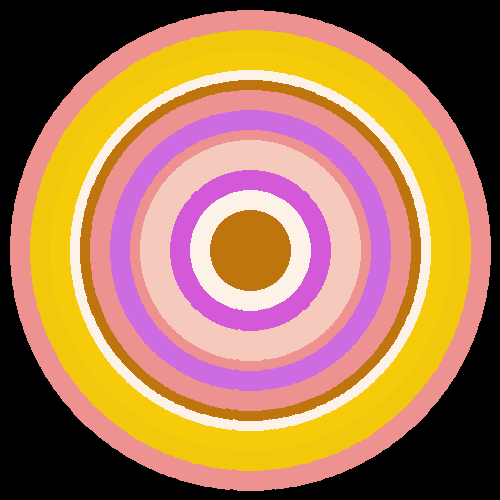

In [41]:
w, h = 500, 500
img = Image.new("RGB", (w, h)) 
x0, y0 = 0, 0

for i in range(len(song)-1, -1, -1):
    chord = chords[song[i]]
    hsl = chord_to_hsl(chord)
    color = "hsl({},{}%,{}%)".format(hsl[0],hsl[1],hsl[2])
    
    x0 += 10
    y0 += 10
    w -= 10
    h -= 10
    shape = [(x0, y0), (w, h)]
    
    img1 = ImageDraw.Draw(img)  
    
    img1.ellipse(shape, fill =color, outline=None)
    
   
    
display(img)

743 483


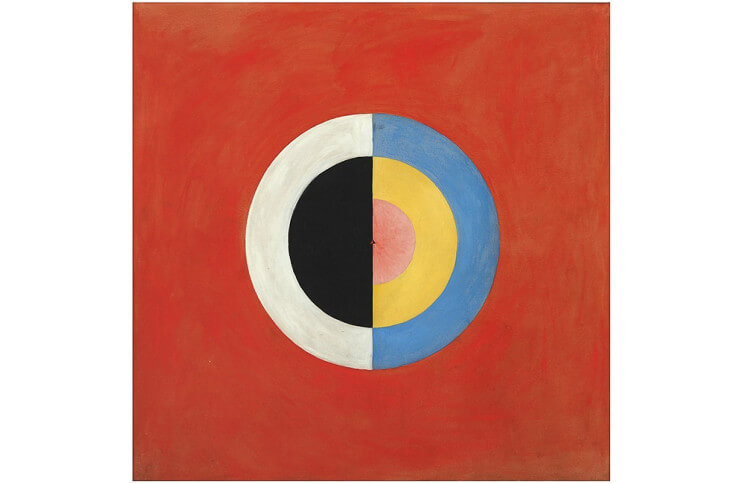

In [54]:
art1 = Image.open("art1.jpg")
width, height = art1.size
print(width, height)
display(art1)

In [58]:
art1_rgb = art1.convert("RGB")

x = width//2
y = height//2

rgb_arr = []
for i in range (25):
    rgb_arr.append(art1_rgb.getpixel((x,y)))
    x += 10
    y += 10
    
print(rgb_arr)

[(107, 28, 33), (225, 126, 105), (223, 145, 125), (231, 169, 158), (238, 205, 89), (234, 197, 82), (229, 191, 90), (89, 143, 190), (83, 135, 183), (92, 126, 161), (196, 59, 41), (187, 54, 37), (185, 52, 37), (181, 59, 38), (186, 54, 39), (182, 57, 39), (184, 61, 43), (180, 64, 39), (179, 69, 44), (179, 67, 45), (179, 69, 46), (183, 79, 52), (177, 83, 55), (174, 89, 60), (247, 247, 245)]


In [62]:
def rgb_to_chord(rgb):
    r = rgb[0]
    g = rgb[1]
    b = rgb[2]
    
    n1 = int(r/255 * 12)
    n2 = int(g/255 * 12)
    n3 = int(b/255 * 12)
    
    return ([int_to_note[n1], int_to_note[n2], int_to_note[n3]])

In [63]:
for c in rgb_arr:
    print(rgb_to_chord(c))

['F', 'C#', 'C#']
['A#', 'F', 'E']
['A#', 'F#', 'F']
['A#', 'G', 'G']
['B', 'A', 'E']
['B', 'A', 'D#']
['A#', 'G#', 'E']
['E', 'F#', 'G#']
['D#', 'F#', 'G#']
['E', 'F', 'G']
['A', 'D', 'C#']
['G#', 'D', 'C#']
['G#', 'D', 'C#']
['G#', 'D', 'C#']
['G#', 'D', 'C#']
['G#', 'D', 'C#']
['G#', 'D', 'D']
['G#', 'D#', 'C#']
['G#', 'D#', 'D']
['G#', 'D#', 'D']
['G#', 'D#', 'D']
['G#', 'D#', 'D']
['G#', 'D#', 'D']
['G#', 'E', 'D']
['B', 'B', 'B']


In [65]:
easyMIDI = EasyMIDI()
track1 = Track("acoustic grand piano") 

for c in rgb_arr:    
    s = rgb_to_chord(c)   
    notes = []
    for i in range(len(s)):
        notes.append(Note(s[i], octave = 4, duration = 1/2, volume = 100))
    chord = Chord(notes)
   
    track1.addNotes([chord])


easyMIDI.addTrack(track1)
easyMIDI.writeMIDI("art1.mid")

In [66]:
Fs = 22050
midi_data = pretty_midi.PrettyMIDI("art1.mid")
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

922 565


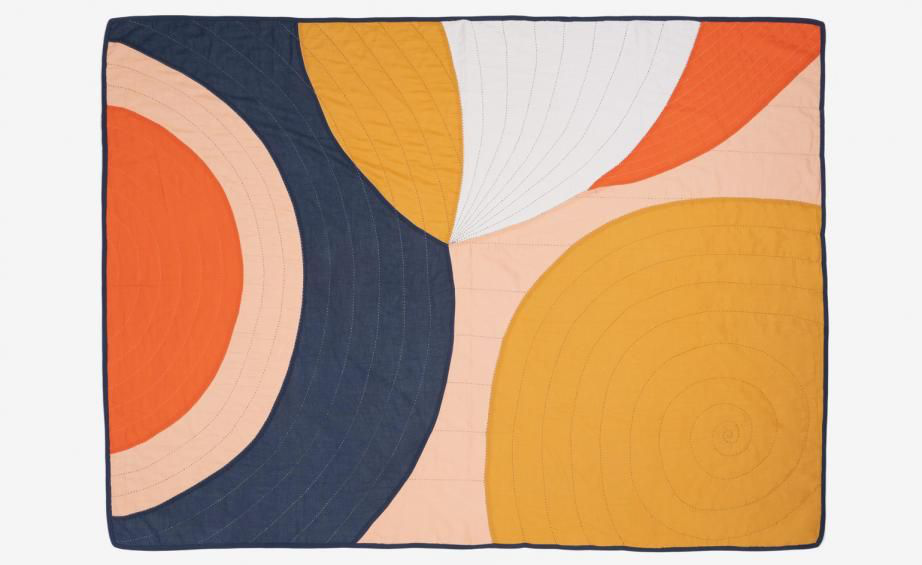

In [67]:
art2 = Image.open("art2.jpg")
width, height = art2.size
print(width, height)
display(art2)

In [74]:
art2_rgb = art2.convert("RGB")

x = 150
y = 50
rgb_arr = []
for i in range (30):
    rgb_arr.append(art2_rgb.getpixel((x,y)))
    x += 15
    y += 15
    
print(rgb_arr)

[(37, 51, 77), (173, 145, 131), (235, 188, 160), (233, 182, 153), (236, 187, 155), (232, 186, 160), (238, 192, 168), (238, 192, 168), (237, 191, 167), (106, 90, 90), (58, 66, 85), (53, 64, 84), (56, 67, 85), (59, 64, 84), (57, 62, 82), (59, 67, 86), (54, 65, 83), (62, 70, 89), (60, 68, 87), (63, 71, 90), (60, 56, 73), (243, 201, 177), (242, 201, 179), (230, 163, 56), (234, 166, 67), (233, 165, 66), (233, 164, 69), (232, 164, 67), (230, 164, 68), (231, 163, 66)]


In [75]:
easyMIDI = EasyMIDI()
track1 = Track("acoustic grand piano") 

for c in rgb_arr:    
    s = rgb_to_chord(c)   
    notes = []
    for i in range(len(s)):
        notes.append(Note(s[i], octave = 4, duration = 1/2, volume = 100))
    chord = Chord(notes)
   
    track1.addNotes([chord])


easyMIDI.addTrack(track1)
easyMIDI.writeMIDI("art2.mid")

In [76]:
Fs = 22050
midi_data = pretty_midi.PrettyMIDI("art1.mid")
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)